# Визуализация данных

1. Исследование данных через их визуальное представление. 
2. Тесно связана с анализом данных (data mining)
3. Программный код для изучения закономерностей и связей в наборе данных: маленький список чисел, помещающийся в одной строке кода, массив из многих гигабайт.
4. Качество не сводится к красивой картинке. 
5. Для нахождения закономерностей

In [1]:
#Подключаем модули
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#Необязательная часть кода
#Убирает комментарий на розовом фоне
import warnings; warnings.simplefilter('ignore')


# Часть 1. Подготовим данные для визуализации #

Скачать датасет можно по адресу https://drive.google.com/file/d/1zy9JKp-bTfF0gRYkGl-g0X4o72NAhl1u/view

In [3]:
#загрузка файла в pandas
df = pd.read_csv('train.csv')

In [4]:
#вывод первых 10 строк

df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#вывод информации о файле
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df['Embarked'].value_counts().index[1]

'C'

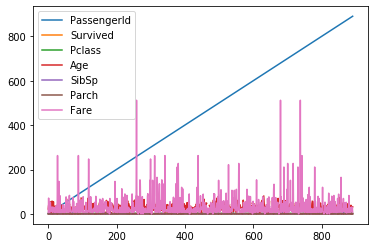

In [7]:
#Применим plot()
df.plot()

## Документация pandas.plotting
https://pandas.pydata.org/docs/reference/plotting.html

In [8]:
#подключает вид вывода графиков из модуля seaborn
sns.set()

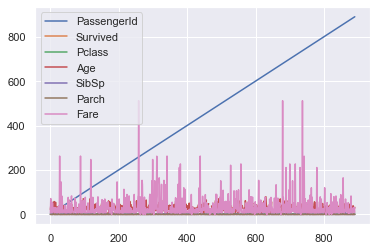

In [9]:
df.plot()

## Изменение датафрейма

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Метод drop()

df.drop([название элементов], axis = 1 или 0, inplace = True)
axis = 1, если нужно удалить столбцы
axis = 0, если нужно удалить строки
inplace = True - удаляем элементы из самой переменной
inplace = False - просто показывается результат изменения, не изменяя переменной, к которой применяется метод

In [11]:
#Удаляем столбцы, в которых нет ценной для нас информации
df.drop(['PassengerId', 'Name', 'Sex', 'SibSp','Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [12]:
df.head(10)

,Survived,Pclass,Age,Fare,Embarked
0,0,3,22.0,7.2500,S
1,1,1,38.0,71.2833,C
2,1,3,26.0,7.9250,S
3,1,1,35.0,53.1000,S
4,0,3,35.0,8.0500,S
5,0,3,NaN,8.4583,Q
6,0,1,54.0,51.8625,S
7,0,3,2.0,21.0750,S
8,1,3,27.0,11.1333,S
9,1,2,14.0,30.0708,C


## Функция round()
Позволяет выполнить округление

round(имя_df[название_колонки], количество знаков]

In [13]:
#Округляем значения в столбце 'Fare' до 2 знаков после запятой
df['Fare'] = round(df['Fare'],2)

In [14]:
#Определяем, где есть пустые значения
df.isna().sum()

Survived      0
Pclass        0
Age         177
Fare          0
Embarked      2
dtype: int64

In [15]:
#Заполняем столбец 'Embarked' метод fillna()
df['Embarked'].fillna('No data', inplace = True)

## Заполняем пустые значения о возрасте

In [16]:
# Cредние арифметические в зависимости от класса каюты
age_1 = df[df['Pclass'] == 1]['Age'].median()
age_2 = df[df['Pclass'] == 2]['Age'].median()
age_3 = df[df['Pclass'] == 3]['Age'].median()

In [17]:
#Функция fill_age()
def fill_age(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return age_1
        if row['Pclass'] == 2:
            return age_2
        return age_3
    return row['Age']

In [18]:
#Применяем функцию к столбцу Age метод apply()
df['Age'] = df.apply(fill_age, axis = 1)

In [19]:
df.head()

,Survived,Pclass,Age,Fare,Embarked
0,0,3,22.0,7.25,S
1,1,1,38.0,71.28,C
2,1,3,26.0,7.92,S
3,1,1,35.0,53.10,S
4,0,3,35.0,8.05,S


# Начинаем рисовать! 

Чтобы получить представления о  визуализациях, которые можно строить в matplotlib, посетите галерею на сайте http://matplotlib.org/. Щелкая на визуализации в галерее, вы сможете просмотреть код, использованный для ее построения.

## Документация matplotlib
https://matplotlib.org/3.1.1/py-modindex.html

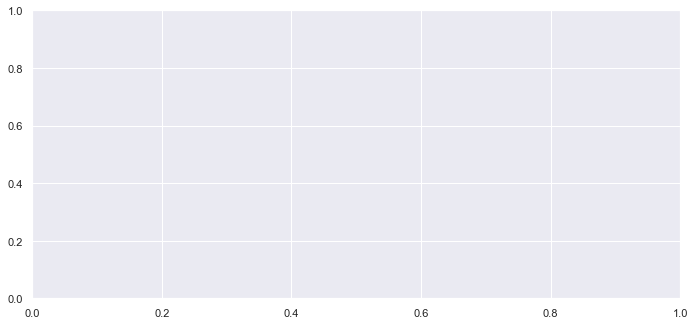

In [20]:
#Создаем систему координат
fig = plt.figure()
axes = fig.add_axes([0,0,1.5,1])


## Диаграмма распределения признаков ##

Text(0, 0.5, 'Количество пассажиров')

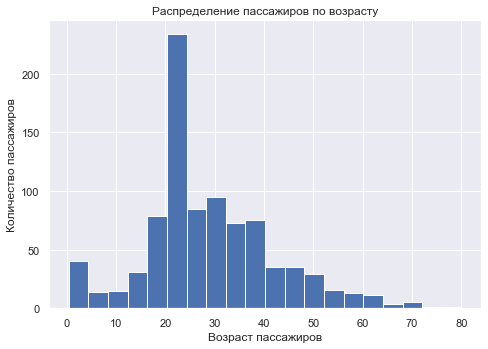

In [21]:
# Рисуем столбчатую диаграмму, отображающую распределение пассажиров по возрасту
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
#Метод hist(название_столбца, ширина стобца bins = )
axes.hist(df['Age'], bins = 20)
#Добавляем подписи
axes.set_title('Распределение пассажиров по возрасту')
axes.set_xlabel('Возраст пассажиров')
axes.set_ylabel('Количество пассажиров')
#title = 'Распределение пассажиров по возрасту'
#xlabel = 'Возраст пассажиров'
#ylabel = 'Количество пассажиров'


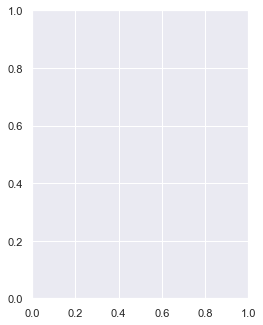

In [22]:
# Рисуем диаграмму, отображающую соотношение выживших и погибших
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.5, 1])


Text(0.5, 1.0, 'Соотношение выживших и погибших')

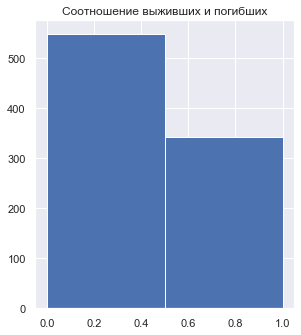

In [23]:
# Соотношение выживших и погибших, метод bar()
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.6, 1])
axes.hist(df['Survived'], bins=2)
axes.set_title('Соотношение выживших и погибших')


In [24]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

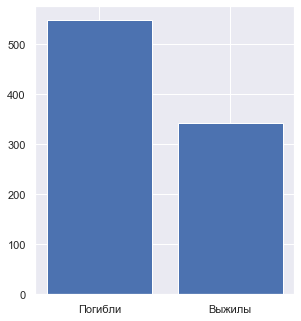

In [25]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.6, 1])
axes.bar(x = ['Погибли', 'Выжилы'], height = df['Survived'].value_counts())

(array([20., 14.,  4.,  4., 13., 27., 21., 61., 40., 24., 28., 31.,  9.,
         8., 16.,  6.,  6.,  5.,  4.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.42      ,  3.73583333,  7.05166667, 10.3675    , 13.68333333,
        16.99916667, 20.315     , 23.63083333, 26.94666667, 30.2625    ,
        33.57833333, 36.89416667, 40.21      , 43.52583333, 46.84166667,
        50.1575    , 53.47333333, 56.78916667, 60.105     , 63.42083333,
        66.73666667, 70.0525    , 73.36833333, 76.68416667, 80.        ]),
 <a list of 24 Patch objects>)

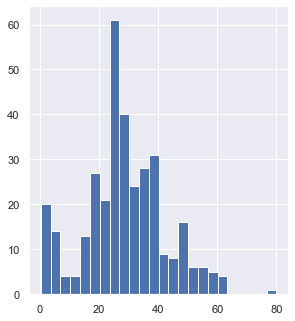

In [26]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.6, 1])
axes.hist(df[df['Survived'] == 1]['Age'], bins = 24)

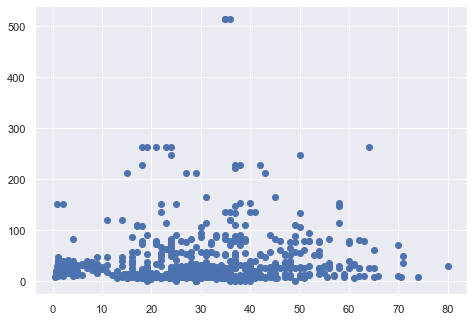

In [27]:
# Рисуем график зависимости стоимости билета от возраста пассажира, метод scatter()
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df["Age"], y = df["Fare"])

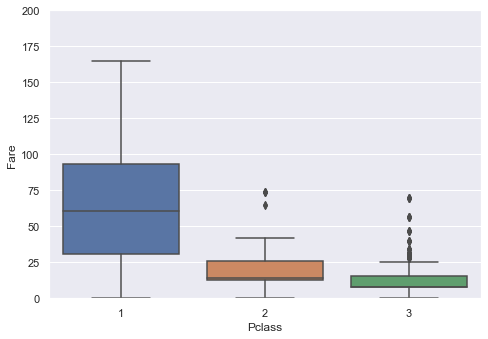

In [28]:
# Рисуем диаграмму, отображающую распределение стоимости билетов в зависимости от класса, метод boxplot()
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])

axes.set_ylim(0,200)
sns.boxplot(x = df['Pclass'], y = df['Fare'])
# Добавим поясняющие подписи


## Рисуем несколько графиков в одном ##

In [29]:
#Создадим новую таблицу с максимальной и минимальной стоимостью билета в зависимости от класса каюты

classes = df[df['Fare'] > 0].groupby(by = 'Pclass')['Fare'].agg(['min','max']).reset_index()
classes['Pclass'] = classes['Pclass'].apply(lambda x: {1:'Первый класс', 2:'Второй класс', 3:'Третий класс'}[x])
classes

,Pclass,min,max
0,Первый класс,5.00,512.33
1,Второй класс,10.50,73.50
2,Третий класс,4.01,69.55


In [30]:
#Построим таблицу процента выживших в зависимости от класса

survived = df.groupby(by = 'Pclass')['Survived'].agg('mean').reset_index()
survived['Pclass'] = survived['Pclass'].apply(lambda x: {1:'Первый класс', 2:'Второй класс', 3:'Третий класс'}[x])
survived

,Pclass,Survived
0,Первый класс,0.629630
1,Второй класс,0.472826
2,Третий класс,0.242363


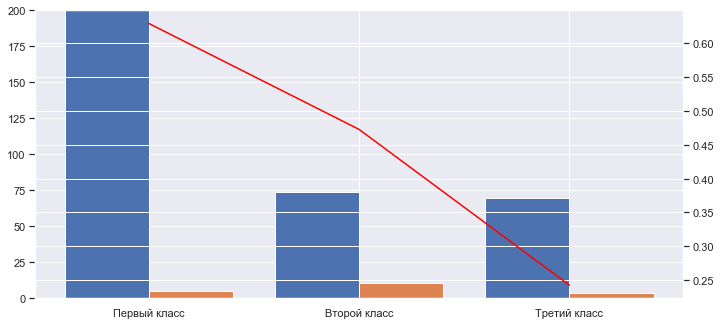

In [31]:
# Рисуем график, отображающий минимальную и максимальную стоимость билета по классам (в виде столбиковой диаграммы)
# и долю выживших по классам в виде линейного графика (все в одной системе координат)

fig = plt.figure()
axes = fig.add_axes([0, 0, 1.5, 1])
axes.set_ylim(0,200)
axes.bar(x = classes['Pclass'], height = classes['max'],align='edge', width = -0.4)
axes.bar(x = classes['Pclass'], height = classes['min'], align='edge', width = 0.4)

axes2 = axes.twinx()
axes2.plot(survived['Pclass'], survived['Survived'], color = 'red')

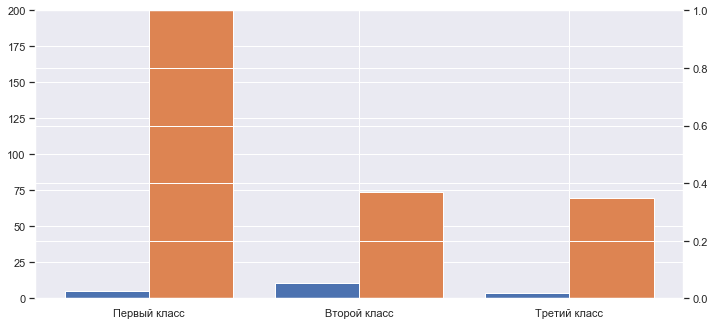

In [32]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.5, 1])
axes.set_ylim(0,200)
axes.bar(x= classes['Pclass'], height = classes['min'], align='edge',width = -0.4)
axes.bar(x= classes['Pclass'], height = classes['max'], align='edge',width = 0.4)
axes2 = axes.twinx()


## Добавляем график в график ##

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.   ,  51.233, 102.466, 153.699, 204.932, 256.165, 307.398,
        358.631, 409.864, 461.097, 512.33 ]),
 <a list of 10 Patch objects>)

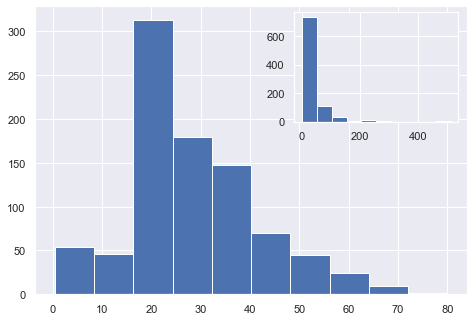

In [44]:
# Сравниваем распределение по возрасту и по стоимости билета
fig = plt.figure()
axes1 = fig.add_axes([0, 0, 1, 1])
#Рисуем диаграму по 'Age'

axes1.hist(df['Age'])
axes2 = fig.add_axes([0.6, 0.6, 0.38, 0.38])
#Рисуем диаграму по 'Fare'

axes2.hist(df['Fare'])


Text(0.5, 1.0, 'Стоимость билетов в третьем классе')

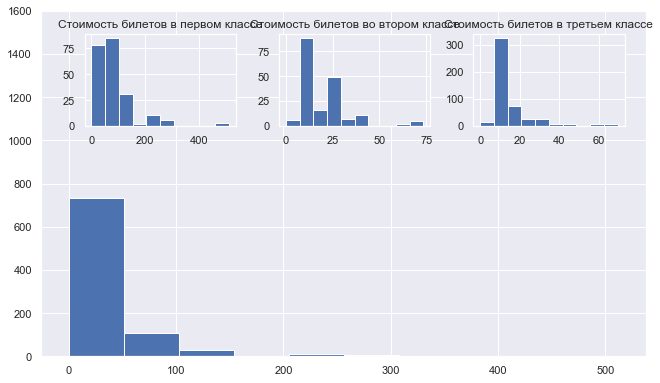

In [45]:
# Строим график, показывающий гистограмму стоимости билета в целом и по классам
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.4, 1.2])
axes.set_ylim(0,1600)
axes1 = fig.add_axes([0.1, 0.8, 0.35, 0.32])
axes2 = fig.add_axes([0.55, 0.8, 0.35, 0.32])
axes3 = fig.add_axes([1, 0.8, 0.35, 0.32])
axes.hist(df['Fare'])
axes1.hist(df[df['Pclass'] == 1]['Fare'])
axes1.set_title('Стоимость билетов в первом классе')
axes2.hist(df[df['Pclass'] == 2]['Fare'])
axes2.set_title('Стоимость билетов во втором классе')
axes3.hist(df[df['Pclass'] == 3]['Fare'])
axes3.set_title('Стоимость билетов в третьем классе')

Text(0.5, 1.0, 'Стоимость билетов в третьем классе')

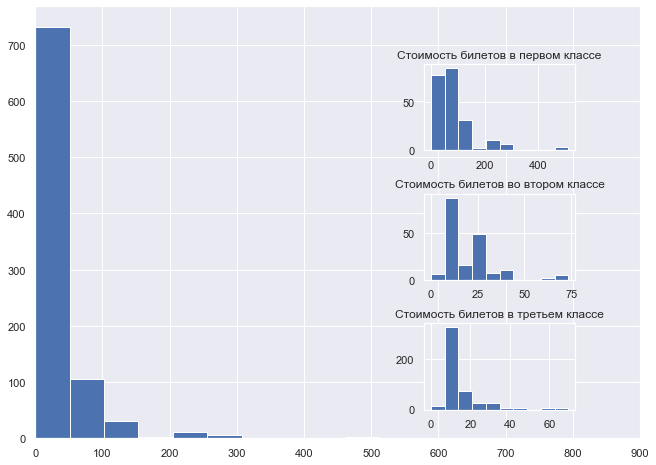

In [47]:
# Строим график, показывающий гистограмму стоимости билета в целом и по классам
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.4, 1.5])
axes.set_xlim(0,900)
axes1 = fig.add_axes([0.9, 0.1, 0.35, 0.3])
axes2 = fig.add_axes([0.9, 0.55, 0.35, 0.3])
axes3 = fig.add_axes([0.9, 1, 0.35, 0.3])
axes.hist(df['Fare'])
axes3.hist(df[df['Pclass'] == 1]['Fare'])
axes3.set_title('Стоимость билетов в первом классе')
axes2.hist(df[df['Pclass'] == 2]['Fare'])
axes2.set_title('Стоимость билетов во втором классе')
axes1.hist(df[df['Pclass'] == 3]['Fare'])
axes1.set_title('Стоимость билетов в третьем классе')

## Строим несколько графиков ##
Задание: построить 3 графика, показывающих распределение стоимости билетов в трех классах в сравнении

Text(0.5, 1.0, 'Стоимость билетов в 3 классе')

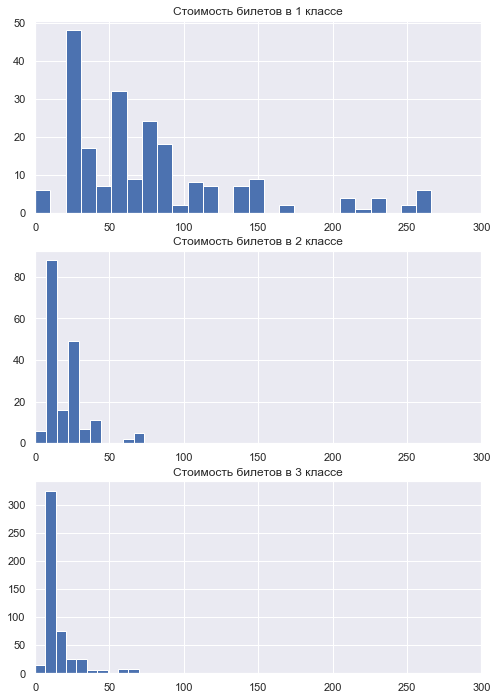

In [48]:
#add_subplot()
fig = plt.figure(figsize = [8,12])
axis1 = fig.add_subplot(3,1,1)
axis2 = fig.add_subplot(312)
axis3 = fig.add_subplot(313)
#hist()
#set_title('Стоимость билетов в 1 классе')
axis1.set_xlim(0,300)
axis1.hist(df[df['Pclass'] == 1]['Fare'], bins = 50)
axis1.set_title('Стоимость билетов в 1 классе')

#Стоимость билетов во 2 классе
axis2.set_xlim(0,300)
axis2.hist(df[df['Pclass'] == 2]['Fare'])
axis2.set_title('Стоимость билетов в 2 классе')

#Стоимость билетов в 3 классе

axis3.set_xlim(0,300)
axis3.hist(df[df['Pclass'] == 3]['Fare'])
axis3.set_title('Стоимость билетов в 3 классе')

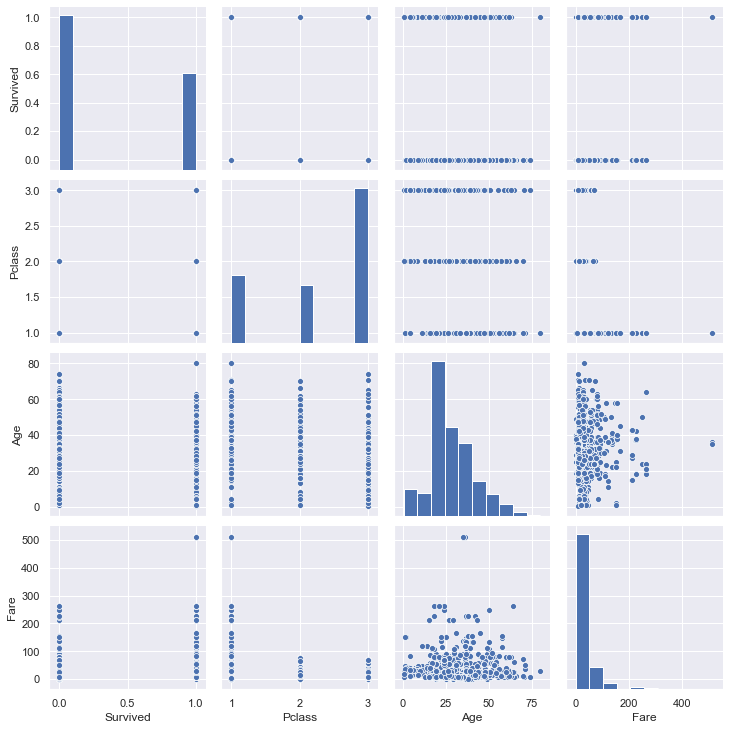

In [49]:
#Строим графики пересечений параметров, метод pairplot()
sns.pairplot(df)

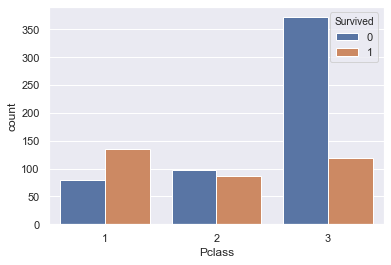

In [50]:
#Метод countplot() 
#Использование параметра hue 
#Зависимость выживших от класса
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)
#sns.countplot(x = 'Pclass', data = df)

# Plotly

## Документация plotly
https://plotly.com/python/getting-started/#jupyterlab-support-python-35

In [39]:
# Установка пакета выполняется только один раз!
!pip install plotly

In [40]:
# Установка пакета выполняется только один раз!
!pip install cufflinks

In [41]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [42]:
init_notebook_mode(connected = True)
cf.go_offline()

In [43]:
df.iplot(kind = 'scatter', x = 'Age', y = 'Fare', mode = 'markers')